## Data Wrangling

Goal: combine the datasets form every week

Problem: 
- CSV from 2 different Twitter-apis, so the columns are slightly different

In [1]:
# import
import numpy as np
import pandas as pd
import glob
import pickle
from datetime import date, time
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df_v1 = pd.read_csv('tweets_25.10_24.10.csv') 
df_v2 = pd.read_csv('tweets_01.01.csv')

In [52]:
df_v1.columns

Index(['tweet_id', 'user_id', 'user_name', 'created_at', 'text', 'full_text',
       'retweets', 'favorite'],
      dtype='object')

In [53]:
df_v2.columns

Index(['tweet_id', 'user_id', 'user_name', 'created_at', 'full_text',
       'retweets', 'favorite'],
      dtype='object')

In [48]:
df_v1.head()

,tweet_id,user_id,user_name,created_at,text,full_text,retweets,favorite
0,1320272848745803777,1108597836755755009,maisdev,Sun Oct 25 07:55:51 +0000 2020,Did some exercises from udemy python course. #...,None,0,0
1,1320263053359910912,3229980963,FmFrancoise,Sun Oct 25 07:16:55 +0000 2020,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,1,2
2,1320260160561053696,285723440,geekanvesh,Sun Oct 25 07:05:26 +0000 2020,Immense learning and great networking at #DSGO...,Immense learning and great networking at #DSGO...,0,1
3,1320258408709197825,1303725429132464128,rampand25356222,Sun Oct 25 06:58:28 +0000 2020,"Day 38,39 of #66daysofdata. Read chapter chapt...","Day 38,39 of #66daysofdata. Read chapter chapt...",0,1
4,1320247344592539648,211289215,IamTonyAK,Sun Oct 25 06:14:30 +0000 2020,#66DaysOfData Day 44: Two thirds of the way th...,#66DaysOfData Day 44: Two thirds of the way th...,1,1


In [49]:
df_v2.head()

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1345015010259578880,1308365362598215680,maszanski,Fri Jan 01 14:32:22 +0000 2021,Day 9 of #66daysofdata \nOn the first day of 2...,0,0
1,1345010985929760768,896716355411611648,martinnyakimov,Fri Jan 01 14:16:22 +0000 2021,[Day 1 of #66DaysOfData]\nStudied and practice...,0,0
2,1345000707984941061,1096479301074063361,Petec0x0,Fri Jan 01 13:35:32 +0000 2021,"Got to know about #66daysofdata today,\nso I'l...",0,0
3,1344988026154360833,1199473474202406912,SadounMohammad,Fri Jan 01 12:45:08 +0000 2021,Day 26 of #66daysofdata \n1-1-2021\n Before th...,0,0
4,1344981372104949760,1344904404240015360,hereigoagainbyk,Fri Jan 01 12:18:42 +0000 2021,My first tweet in this account. \nAnw I'll be ...,2,0


### What is different?

- columns are nearly identical 
- in v1 there is a `text` and a `full_text` column whereas in v2 is just a `full_text` column
- the difference is that if a tweet is below a certain amount of spaces it will be stored in the text column otherwise it will be stored in the full_text column (Twitter sandbox api)
- tweepy on the other side returns just the `full_text` column

#### ToDo
- find which file is in the v1 and which is in the v2 format (the most will be in the v2 format)

In [16]:
# every csv-file in the folder
!ls *.csv

tweets_01.01.csv              tweets_18.12_tweepy.csv
tweets_04.02.csv              tweets_19.11tweepy.csv
tweets_05.03.csv              tweets_21.01.csv
tweets_06.11_28.10_tweepy.csv tweets_22.10_03.10.csv
tweets_07.01.csv              tweets_25.02.csv
tweets_10.12_tweepy.csv       tweets_25.10_24.10.csv
tweets_11.02.csv              tweets_26.11_tweepy.csv
tweets_11.03.csv              tweets_26.12_tweepy.csv
tweets_13.11_06.11_tweepy.csv tweets_29.01.csv
tweets_14.01.csv              tweets_29.10_19.10_tweepy.csv
tweets_17.03.2021.csv         tweets_3.12_tweepy.csv
tweets_18.02.csv


In [21]:
df_v1[['text', 'full_text']].head()

,text,full_text
0,Did some exercises from udemy python course. #...,None
1,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...
2,Immense learning and great networking at #DSGO...,Immense learning and great networking at #DSGO...
3,"Day 38,39 of #66daysofdata. Read chapter chapt...","Day 38,39 of #66daysofdata. Read chapter chapt..."
4,#66DaysOfData Day 44: Two thirds of the way th...,#66DaysOfData Day 44: Two thirds of the way th...


In [27]:
# replace none in full_text with the input from the text column
df_v1['full_text'] = np.where(df_v1['full_text']=='None', df_v1['text'], df_v1['full_text'])

In [30]:
df_v1.head(20)

,tweet_id,user_id,user_name,created_at,text,full_text,retweets,favorite
0,1320272848745803777,1108597836755755009,maisdev,Sun Oct 25 07:55:51 +0000 2020,Did some exercises from udemy python course. #...,Did some exercises from udemy python course. #...,0,0
1,1320263053359910912,3229980963,FmFrancoise,Sun Oct 25 07:16:55 +0000 2020,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,1,2
2,1320260160561053696,285723440,geekanvesh,Sun Oct 25 07:05:26 +0000 2020,Immense learning and great networking at #DSGO...,Immense learning and great networking at #DSGO...,0,1
3,1320258408709197825,1303725429132464128,rampand25356222,Sun Oct 25 06:58:28 +0000 2020,"Day 38,39 of #66daysofdata. Read chapter chapt...","Day 38,39 of #66daysofdata. Read chapter chapt...",0,1
4,1320247344592539648,211289215,IamTonyAK,Sun Oct 25 06:14:30 +0000 2020,#66DaysOfData Day 44: Two thirds of the way th...,#66DaysOfData Day 44: Two thirds of the way th...,1,1
5,1320237821656006657,1291114285507186690,jaimedatalatte,Sun Oct 25 05:36:40 +0000 2020,D52. #66DaysofData \n\n- kept working on this ...,D52. #66DaysofData \n\n- kept working on this ...,0,3
6,1320236744185421824,1290013787819593735,math3mantic_,Sun Oct 25 05:32:23 +0000 2020,"Day 53 of #66daysofdata: Today, I finished Cha...","Day 53 of #66daysofdata: Today, I finished Cha...",0,2
7,1320231455952338944,1247769181002403841,ahanawrites,Sun Oct 25 05:11:22 +0000 2020,Day 54 of #66daysofdata: Adam (Adaptive moment...,Day 54 of #66daysofdata: Adam (Adaptive moment...,0,1
8,1320230740886507525,1301208059486842882,ceeezthedata,Sun Oct 25 05:08:31 +0000 2020,🗓 Day 53 of #66daysofdata \n#DataAnalytics #Da...,🗓 Day 53 of #66daysofdata \n#DataAnalytics #Da...,0,1
9,1320228020439797760,1300541186864590848,trainandtest,Sun Oct 25 04:57:43 +0000 2020,#QuestionOfTheDay How to deal with imbalanced ...,#QuestionOfTheDay How to deal with imbalanced ...,3,6


In [33]:
df_v1.drop('text', 1, inplace=True)

In [34]:
df_v1

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1320272848745803777,1108597836755755009,maisdev,Sun Oct 25 07:55:51 +0000 2020,Did some exercises from udemy python course. #...,0,0
1,1320263053359910912,3229980963,FmFrancoise,Sun Oct 25 07:16:55 +0000 2020,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,1,2
2,1320260160561053696,285723440,geekanvesh,Sun Oct 25 07:05:26 +0000 2020,Immense learning and great networking at #DSGO...,0,1
3,1320258408709197825,1303725429132464128,rampand25356222,Sun Oct 25 06:58:28 +0000 2020,"Day 38,39 of #66daysofdata. Read chapter chapt...",0,1
4,1320247344592539648,211289215,IamTonyAK,Sun Oct 25 06:14:30 +0000 2020,#66DaysOfData Day 44: Two thirds of the way th...,1,1
5,1320237821656006657,1291114285507186690,jaimedatalatte,Sun Oct 25 05:36:40 +0000 2020,D52. #66DaysofData \n\n- kept working on this ...,0,3
6,1320236744185421824,1290013787819593735,math3mantic_,Sun Oct 25 05:32:23 +0000 2020,"Day 53 of #66daysofdata: Today, I finished Cha...",0,2
7,1320231455952338944,1247769181002403841,ahanawrites,Sun Oct 25 05:11:22 +0000 2020,Day 54 of #66daysofdata: Adam (Adaptive moment...,0,1
8,1320230740886507525,1301208059486842882,ceeezthedata,Sun Oct 25 05:08:31 +0000 2020,🗓 Day 53 of #66daysofdata \n#DataAnalytics #Da...,0,1
9,1320228020439797760,1300541186864590848,trainandtest,Sun Oct 25 04:57:43 +0000 2020,#QuestionOfTheDay How to deal with imbalanced ...,3,6


### Task 2: combine DataFrames

- Option 1: read in every DataFrame, make the changes to them and combine them by hand
- Option 2: read them in automatically 

In [37]:
# glob lets you apply UNIX based pattern matching
all_files = glob.glob("*.csv")

In [38]:
all_files

['tweets_25.10_24.10.csv',
 'tweets_07.01.csv',
 'tweets_29.10_19.10_tweepy.csv',
 'tweets_21.01.csv',
 'tweets_06.11_28.10_tweepy.csv',
 'tweets_05.03.csv',
 'tweets_17.03.2021.csv',
 'tweets_29.01.csv',
 'tweets_01.01.csv',
 'tweets_19.11tweepy.csv',
 'tweets_25.02.csv',
 'tweets_3.12_tweepy.csv',
 'tweets_18.12_tweepy.csv',
 'tweets_26.12_tweepy.csv',
 'tweets_11.03.csv',
 'tweets_11.02.csv',
 'tweets_14.01.csv',
 'tweets_26.11_tweepy.csv',
 'tweets_18.02.csv',
 'tweets_22.10_03.10.csv',
 'tweets_04.02.csv',
 'tweets_13.11_06.11_tweepy.csv',
 'tweets_10.12_tweepy.csv']

In [60]:
# empty list to store the DataFrames
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    
    # check if amount of clumns is 8 to perfome the cleaning step
    if len(df.columns) == 8:
        # replace None string
        df['full_text'] = np.where(df['full_text']=='None', df['text'], df['full_text'])
        # delete text column
        df.drop('text', 1, inplace=True)
    
    # append DataFrame to list 
    li.append(df)

In [78]:
# check length of columns in every DataFrame in the list
for x in range(len(li)):
    print(len(li[x].columns))

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


now every DataFrame has the same amount of columns so we can combine them into one singel csv

In [79]:
frame = pd.concat(li, axis=0, ignore_index=True)

In [81]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    11224 non-null  int64 
 1   user_id     11224 non-null  int64 
 2   user_name   11224 non-null  object
 3   created_at  11224 non-null  object
 4   full_text   11224 non-null  object
 5   retweets    11224 non-null  int64 
 6   favorite    11224 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 613.9+ KB


In [82]:
frame

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1320272848745803777,1108597836755755009,maisdev,Sun Oct 25 07:55:51 +0000 2020,Did some exercises from udemy python course. #...,0,0
1,1320263053359910912,3229980963,FmFrancoise,Sun Oct 25 07:16:55 +0000 2020,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,1,2
2,1320260160561053696,285723440,geekanvesh,Sun Oct 25 07:05:26 +0000 2020,Immense learning and great networking at #DSGO...,0,1
3,1320258408709197825,1303725429132464128,rampand25356222,Sun Oct 25 06:58:28 +0000 2020,"Day 38,39 of #66daysofdata. Read chapter chapt...",0,1
4,1320247344592539648,211289215,IamTonyAK,Sun Oct 25 06:14:30 +0000 2020,#66DaysOfData Day 44: Two thirds of the way th...,1,1
...,...,...,...,...,...,...,...
11219,1333714720705052674,1453368613,VivanVatsa,Tue Dec 01 10:09:03 +0000 2020,hello world.\nI'm part of the #66daysofdata ch...,0,2
11220,1333682990749163520,2212129783,sam_jwalsh,Tue Dec 01 08:02:58 +0000 2020,#66daysofdata \nDay 14:\nWow two weeks already...,0,2
11221,1333678101507710977,1300541186864590848,trainandtest,Tue Dec 01 07:43:32 +0000 2020,A complete guide to Sentiment Analysis and it’...,7,6
11222,1333642357967876096,1301025989359788033,AMuktineni,Tue Dec 01 05:21:30 +0000 2020,Day 5 of #66daysofdata (2.0)\n\nCompleted Chap...,1,10


### Task 3: clean DataFrame

- make `created_at` a datetime column
- from collecting I know that there are duplicate rows in the frame, the problem is since they are collected over different periods the duplicats wont just have the same row it is likely that retweets and favorite are different between duplicates so will compare the `full-text` column

In [89]:
# make created at a datetime column
frame['created_at'] = pd.to_datetime(frame['created_at'])

In [91]:
frame.sort_values('created_at')

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
10051,1312390127189065728,134117592,SouzaMarvin,2020-10-03 13:52:44+00:00,Day 32 of #66daysofdata\n\nHave paused the Pro...,0,7
10050,1312394855578886145,1305373286625193984,RayChristofer2,2020-10-03 14:11:31+00:00,"#66daysofdata\nDay 17, I get more confused in ...",0,6
10049,1312396338819145728,422011719,SavyaSachiGupta,2020-10-03 14:17:24+00:00,Day 33 of #66DaysOfData!\n\n🎶Whoa! We're halfw...,0,13
10048,1312396453466255363,422011719,SavyaSachiGupta,2020-10-03 14:17:52+00:00,Day 33 of #66DaysOfData: @KenJee_DS\n\nCluster...,0,13
10047,1312396575331606529,1188798821024722945,HanReha11033925,2020-10-03 14:18:21+00:00,Day 32: #66daysofdata\n1. Completed Kaggle's I...,0,6
...,...,...,...,...,...,...,...
3084,1372130728465424390,23293578,therealjaysueno,2021-03-17 10:20:33+00:00,Day 24 of #66daysofdata. Today I’ve been prepp...,0,2
3083,1372138545784164353,1154041072743407616,JengaSchool,2021-03-17 10:51:37+00:00,Building a data-driven culture is critical for...,0,0
3082,1372140778126909442,1188798821024722945,Muh_Raihan_P,2021-03-17 11:00:29+00:00,Day 64 of #66daysofdata v2:\nAgain only a mino...,0,0
3081,1372164803410554882,1007227234229161984,thedatacrack,2021-03-17 12:35:57+00:00,Day 20 of @KenJee_DS 's #66daysofdata Round 2 ...,0,0


In [100]:
# duplicates in the column full_text
frame[frame.duplicated(['full_text'])]

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
719,1321369026828947457,3229980963,FmFrancoise,2020-10-28 08:31:40+00:00,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,5,9
778,1321002023681200128,3229980963,FmFrancoise,2020-10-27 08:13:20+00:00,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,1,8
911,1320272848745803777,1108597836755755009,maisdev,2020-10-25 07:55:51+00:00,Did some exercises from udemy python course. #...,1,2
912,1320263053359910912,3229980963,FmFrancoise,2020-10-25 07:16:55+00:00,kaggle via NodeXL https://t.co/eneHJyGWcG\n@ka...,3,11
913,1320260160561053696,285723440,geekanvesh,2020-10-25 07:05:26+00:00,Immense learning and great networking at #DSGO...,0,6
...,...,...,...,...,...,...,...
11219,1333714720705052674,1453368613,VivanVatsa,2020-12-01 10:09:03+00:00,hello world.\nI'm part of the #66daysofdata ch...,0,2
11220,1333682990749163520,2212129783,sam_jwalsh,2020-12-01 08:02:58+00:00,#66daysofdata \nDay 14:\nWow two weeks already...,0,2
11221,1333678101507710977,1300541186864590848,trainandtest,2020-12-01 07:43:32+00:00,A complete guide to Sentiment Analysis and it’...,7,6
11222,1333642357967876096,1301025989359788033,AMuktineni,2020-12-01 05:21:30+00:00,Day 5 of #66daysofdata (2.0)\n\nCompleted Chap...,1,10


ther are 1497 duplicates in the DataFrame

In [106]:
# drop the duplicates
frame = frame.sort_values('created_at').drop_duplicates(subset=['full_text'], keep='last')

In [107]:
frame

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
10051,1312390127189065728,134117592,SouzaMarvin,2020-10-03 13:52:44+00:00,Day 32 of #66daysofdata\n\nHave paused the Pro...,0,7
10050,1312394855578886145,1305373286625193984,RayChristofer2,2020-10-03 14:11:31+00:00,"#66daysofdata\nDay 17, I get more confused in ...",0,6
10049,1312396338819145728,422011719,SavyaSachiGupta,2020-10-03 14:17:24+00:00,Day 33 of #66DaysOfData!\n\n🎶Whoa! We're halfw...,0,13
10048,1312396453466255363,422011719,SavyaSachiGupta,2020-10-03 14:17:52+00:00,Day 33 of #66DaysOfData: @KenJee_DS\n\nCluster...,0,13
10047,1312396575331606529,1188798821024722945,HanReha11033925,2020-10-03 14:18:21+00:00,Day 32: #66daysofdata\n1. Completed Kaggle's I...,0,6
...,...,...,...,...,...,...,...
3084,1372130728465424390,23293578,therealjaysueno,2021-03-17 10:20:33+00:00,Day 24 of #66daysofdata. Today I’ve been prepp...,0,2
3083,1372138545784164353,1154041072743407616,JengaSchool,2021-03-17 10:51:37+00:00,Building a data-driven culture is critical for...,0,0
3082,1372140778126909442,1188798821024722945,Muh_Raihan_P,2021-03-17 11:00:29+00:00,Day 64 of #66daysofdata v2:\nAgain only a mino...,0,0
3081,1372164803410554882,1007227234229161984,thedatacrack,2021-03-17 12:35:57+00:00,Day 20 of @KenJee_DS 's #66daysofdata Round 2 ...,0,0


In [110]:
# Save final DataFrame
frame.to_csv('finalFrame.csv', index=False)

# save as pickl
with open('finalFrame.pkl', 'wb') as f:
    pickle.dump(frame, f)

### Next Step: find missing Data and use Twitter Sandbox API to retrive the data

In [2]:
# read finalFrame
frame = pd.read_csv('finalFrame.csv') 
# make created at a datetime column
frame['created_at'] = pd.to_datetime(frame['created_at'])

In [3]:
frame

,tweet_id,user_id,user_name,created_at,full_text,retweets,favorite
0,1312390127189065728,134117592,SouzaMarvin,2020-10-03 13:52:44+00:00,Day 32 of #66daysofdata\n\nHave paused the Pro...,0,7
1,1312394855578886145,1305373286625193984,RayChristofer2,2020-10-03 14:11:31+00:00,"#66daysofdata\nDay 17, I get more confused in ...",0,6
2,1312396338819145728,422011719,SavyaSachiGupta,2020-10-03 14:17:24+00:00,Day 33 of #66DaysOfData!\n\n🎶Whoa! We're halfw...,0,13
3,1312396453466255363,422011719,SavyaSachiGupta,2020-10-03 14:17:52+00:00,Day 33 of #66DaysOfData: @KenJee_DS\n\nCluster...,0,13
4,1312396575331606529,1188798821024722945,HanReha11033925,2020-10-03 14:18:21+00:00,Day 32: #66daysofdata\n1. Completed Kaggle's I...,0,6
...,...,...,...,...,...,...,...
9722,1372130728465424390,23293578,therealjaysueno,2021-03-17 10:20:33+00:00,Day 24 of #66daysofdata. Today I’ve been prepp...,0,2
9723,1372138545784164353,1154041072743407616,JengaSchool,2021-03-17 10:51:37+00:00,Building a data-driven culture is critical for...,0,0
9724,1372140778126909442,1188798821024722945,Muh_Raihan_P,2021-03-17 11:00:29+00:00,Day 64 of #66daysofdata v2:\nAgain only a mino...,0,0
9725,1372164803410554882,1007227234229161984,thedatacrack,2021-03-17 12:35:57+00:00,Day 20 of @KenJee_DS 's #66daysofdata Round 2 ...,0,0


In [4]:
# split date from time
frame['date'] = [d.date() for d in frame['created_at']]
frame['time'] = [d.time() for d in frame['created_at']]
frame.drop(['created_at'], 1, inplace=True)

In [5]:
# group up date and count number of tweets on that day
countTweetsDay = frame.groupby(['date']).count()['tweet_id']
countTweetsDay = pd.DataFrame(countTweetsDay)
countTweetsDay.rename(columns={'tweet_id': 'count'}, inplace=True)

In [6]:
print('mean: ' + str(countTweetsDay['count'].mean()))
print('median: ' + str(countTweetsDay['count'].median()))
print('max: ' + str(countTweetsDay['count'].max()))
print('min: ' + str(countTweetsDay['count'].min()))

mean: 58.596385542168676
median: 64.0
max: 126
min: 8


In [7]:
# explore the date with only 8 tweets
countTweetsDay[countTweetsDay['count']==8]

,count
date,
2020-12-19,8
2020-12-20,8


In [8]:
# check manually each day that is in the collection
#for i in countTweetsDay.sort_index().index:
 #  print(i)

In [9]:
# check time delta to find missing dates between start and current state of the data collection
start_date = date(2020, 10, 3)
end_date = date(2021, 3, 17)
delta = end_date - start_date
print(delta.days)

165


there seems to be no missing dates between the start and the end of the data collection. lets check the fist time and last time of a tweet submission for each day

In [10]:
# create DF with date, first time of tweet on that day and last time of tweet on that day
countTweetsDay.sort_index().index

Index([2020-10-03, 2020-10-04, 2020-10-05, 2020-10-06, 2020-10-07, 2020-10-08,
       2020-10-09, 2020-10-10, 2020-10-11, 2020-10-12,
       ...
       2021-03-08, 2021-03-09, 2021-03-10, 2021-03-11, 2021-03-12, 2021-03-13,
       2021-03-14, 2021-03-15, 2021-03-16, 2021-03-17],
      dtype='object', name='date', length=166)

In [169]:
frame

,tweet_id,user_id,user_name,full_text,retweets,favorite,date,time
10051,1312390127189065728,134117592,SouzaMarvin,Day 32 of #66daysofdata\n\nHave paused the Pro...,0,7,2020-10-03,13:52:44
10050,1312394855578886145,1305373286625193984,RayChristofer2,"#66daysofdata\nDay 17, I get more confused in ...",0,6,2020-10-03,14:11:31
10049,1312396338819145728,422011719,SavyaSachiGupta,Day 33 of #66DaysOfData!\n\n🎶Whoa! We're halfw...,0,13,2020-10-03,14:17:24
10048,1312396453466255363,422011719,SavyaSachiGupta,Day 33 of #66DaysOfData: @KenJee_DS\n\nCluster...,0,13,2020-10-03,14:17:52
10047,1312396575331606529,1188798821024722945,HanReha11033925,Day 32: #66daysofdata\n1. Completed Kaggle's I...,0,6,2020-10-03,14:18:21
...,...,...,...,...,...,...,...,...
3084,1372130728465424390,23293578,therealjaysueno,Day 24 of #66daysofdata. Today I’ve been prepp...,0,2,2021-03-17,10:20:33
3083,1372138545784164353,1154041072743407616,JengaSchool,Building a data-driven culture is critical for...,0,0,2021-03-17,10:51:37
3082,1372140778126909442,1188798821024722945,Muh_Raihan_P,Day 64 of #66daysofdata v2:\nAgain only a mino...,0,0,2021-03-17,11:00:29
3081,1372164803410554882,1007227234229161984,thedatacrack,Day 20 of @KenJee_DS 's #66daysofdata Round 2 ...,0,0,2021-03-17,12:35:57


In [170]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9727 entries, 10051 to 3080
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   9727 non-null   int64 
 1   user_id    9727 non-null   int64 
 2   user_name  9727 non-null   object
 3   full_text  9727 non-null   object
 4   retweets   9727 non-null   int64 
 5   favorite   9727 non-null   int64 
 6   date       9727 non-null   object
 7   time       9727 non-null   object
dtypes: int64(4), object(4)
memory usage: 942.0+ KB


In [172]:
frame[frame['date']==date(2020,10,3)]

,tweet_id,user_id,user_name,full_text,retweets,favorite,date,time
10051,1312390127189065728,134117592,SouzaMarvin,Day 32 of #66daysofdata\n\nHave paused the Pro...,0,7,2020-10-03,13:52:44
10050,1312394855578886145,1305373286625193984,RayChristofer2,"#66daysofdata\nDay 17, I get more confused in ...",0,6,2020-10-03,14:11:31
10049,1312396338819145728,422011719,SavyaSachiGupta,Day 33 of #66DaysOfData!\n\n🎶Whoa! We're halfw...,0,13,2020-10-03,14:17:24
10048,1312396453466255363,422011719,SavyaSachiGupta,Day 33 of #66DaysOfData: @KenJee_DS\n\nCluster...,0,13,2020-10-03,14:17:52
10047,1312396575331606529,1188798821024722945,HanReha11033925,Day 32: #66daysofdata\n1. Completed Kaggle's I...,0,6,2020-10-03,14:18:21
10046,1312402775645458432,1243908659609866242,GargPy,"Dr. Terris 3 Laws, helpful for ML practitioner...",0,11,2020-10-03,14:42:59
10045,1312405500798013441,53420382,SaumyaPatel,"While learning JAVASCRIPT,\ntrain your MINDSET...",11,10,2020-10-03,14:53:49
10044,1312406486815973376,725438802,huangyutao09,Day 21 of #66daysofdata \nLearning chapter 5 o...,0,6,2020-10-03,14:57:44
10043,1312414598310420480,2646991704,Iam00ffff,day 11 of #100DaysofCode and day 22 of #66days...,2,17,2020-10-03,15:29:58
10042,1312423127985446912,2562318241,NeemaMV,Day 33 of #66daysofdata #DataScience \nStarted...,1,3,2020-10-03,16:03:52


In [196]:
 frame[frame['date']==countTweetsDay.sort_index().index[0]]['time'].min()

datetime.time(13, 52, 44)

In [197]:
 frame[frame['date']==countTweetsDay.sort_index().index[0]]['time'].max()

datetime.time(23, 40, 22)

In [202]:
mintimelist = []
maxtimelist = []

for i in range(len(countTweetsDay.sort_index().index)):
    mintime = frame[frame['date']==countTweetsDay.sort_index().index[i]]['time'].min()
    maxtime = frame[frame['date']==countTweetsDay.sort_index().index[i]]['time'].max()
    mintimelist.append(mintime)
    maxtimelist.append(maxtime)

In [207]:
len(mintimelist), len(maxtimelist)

(166, 166)

In [209]:
len(countTweetsDay.sort_index().index)

166

In [210]:
# make DataFrame out of mintimelist, maxtimelist and the dates
minmaxtime_df = pd.DataFrame(
    {'date': countTweetsDay.sort_index().index,
     'first_tweet': mintimelist,
     'last_tweet': maxtimelist
    })

In [214]:
minmaxtime_df['first_tweet']

0      13:52:44
1      00:03:55
2      00:17:32
3      00:16:26
4      00:13:36
         ...   
161    00:03:25
162    00:06:29
163    00:55:02
164    00:49:58
165    00:01:20
Name: first_tweet, Length: 166, dtype: object

amount of day where the first tweet was not around 00:00 

In [223]:
minmaxtime_df[minmaxtime_df['first_tweet']>time(1, 0, 0)]

,date,first_tweet,last_tweet
0,2020-10-03,13:52:44,23:40:22
14,2020-10-17,01:20:37,23:35:12
40,2020-11-12,01:27:31,23:14:14
43,2020-11-15,01:34:18,20:44:47
44,2020-11-16,02:02:37,21:56:39
45,2020-11-17,01:28:33,22:52:34
46,2020-11-18,02:07:26,23:49:07
48,2020-11-20,03:01:13,23:16:12
49,2020-11-21,03:04:37,22:58:54
50,2020-11-22,03:18:16,21:30:07


In [227]:
minmaxtime_df.sort_values(['first_tweet'], ascending=False) 

,date,first_tweet,last_tweet
0,2020-10-03,13:52:44,23:40:22
77,2020-12-19,05:16:49,18:55:56
84,2020-12-26,04:29:23,23:33:26
67,2020-12-09,03:32:16,23:48:00
50,2020-11-22,03:18:16,21:30:07
...,...,...,...
123,2021-02-03,00:01:05,23:29:28
148,2021-02-28,00:00:51,23:25:06
146,2021-02-26,00:00:39,23:38:05
95,2021-01-06,00:00:36,23:51:36


In [231]:
minmaxtime_df[minmaxtime_df['last_tweet']<time(20, 0, 0)]

,date,first_tweet,last_tweet
42,2020-11-14,00:42:16,19:54:26
54,2020-11-26,01:21:23,19:45:23
58,2020-11-30,01:27:05,19:49:53
60,2020-12-02,00:58:14,17:47:16
71,2020-12-13,00:53:39,19:20:48
72,2020-12-14,00:30:21,19:52:10
75,2020-12-17,01:47:20,18:22:13
77,2020-12-19,05:16:49,18:55:56
78,2020-12-20,02:26:00,17:15:21
79,2020-12-21,01:52:16,18:27:00


In [232]:
minmaxtime_df.sort_values(['last_tweet'], ascending=True) 

,date,first_tweet,last_tweet
165,2021-03-17,00:01:20,12:58:46
78,2020-12-20,02:26:00,17:15:21
60,2020-12-02,00:58:14,17:47:16
81,2020-12-23,01:26:32,18:19:41
75,2020-12-17,01:47:20,18:22:13
...,...,...,...
21,2020-10-24,00:35:08,23:59:19
5,2020-10-08,00:47:25,23:59:23
147,2021-02-27,00:36:05,23:59:32
107,2021-01-18,00:17:31,23:59:36


### Conclusion
- for first tweet of the day:
    - 2020-10-03 is misssing half of the day (due to method of collecting data)
    - 2020-12-19 the first tweet is 5 hours into the day
    - 2020-12-26 the first tweet is 4:30 into the day (most likely due to christmas) -> wont look into this further
    
- for last tweet of the day:
    - 2021-03-17 is missing half of the day (due to method of collecting data)
    - 2020-12-20 last tweet 7 hours before the day ends 
    - 2020-12-02 last tweet 6 hours before the day ends

I will look into these but for the most part I guess a day with low tweets

In [234]:
# check low tweets hypothesis
countTweetsDay.loc[date(2020, 12, 20)]

count    8
Name: 2020-12-20, dtype: int64

In [235]:
countTweetsDay.loc[date(2020, 12, 2)]

count    17
Name: 2020-12-02, dtype: int64

### Visualizations

In [11]:
countTweetsDay

,count
date,
2020-10-03,54
2020-10-04,117
2020-10-05,109
2020-10-06,111
2020-10-07,118
...,...
2021-03-13,32
2021-03-14,45
2021-03-15,48


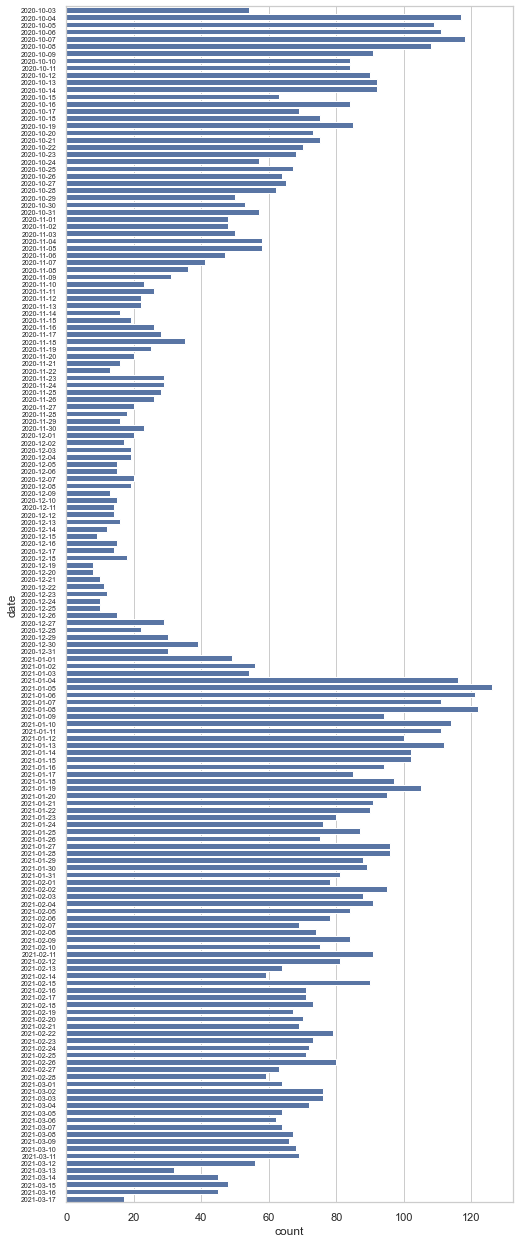

In [26]:

f, ax = plt.subplots(figsize=(8, 22))
sns.barplot(y=countTweetsDay.index, x= countTweetsDay['count'], color="b")
plt.yticks(fontsize=7);

this look right to me and ends the data wrangling part. The low number of tweets from mid November till the end of December is due to the the fact that the most people started the challenge more or less on the first day so they are going to end it on the same date. Participants who started later are finished later that's why there is a low number of tweets in that area.

I will analyze this in the next part.

## ToDo

- add tweets before the third of October